In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from io import StringIO
from random import randint


In [24]:
def plot_boundaries(X_train, X_test, y_train, y_test, score, probability_func, h = .02, ax = None):
    X = np.vstack((X_test, X_train))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    if ax is None:
        ax = plt.subplot(1, 1, 1)
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    
    Z = probability_func(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    cf = ax.contourf(xx, yy, Z, 50, cmap=cm, alpha=.8)
    plt.colorbar(cf, ax=ax)
    #plt.colorbar(Z,ax=ax)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k', s=100)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6, s=200)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=40, horizontalalignment='right')
    plt.show()

In [25]:
def train_and_plot(X, y, h=1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=randint(0, 99))
    gaussianNB = GaussianNB()
    #Entrenamos el modelo
    y_pred = gaussianNB.fit(X_train, y_train)
    score = gaussianNB.score(X_train, y_train)
    #Graficamos
    plot_boundaries(X_train, X_test, y_train, y_test, score, gaussianNB.predict_proba)
    return

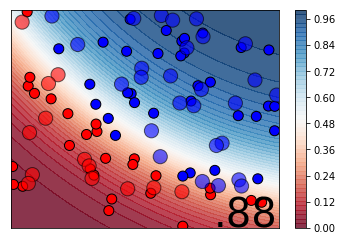

In [26]:
X = []
y = []
with open("./datasets/student_admission.txt") as m:
    for i,line in enumerate(m):
        data = np.genfromtxt(StringIO(line), delimiter=",")
        subX = data[0], data[1]
        X.append(subX)
        y.append(data[2])
train_and_plot(np.array(X), y)

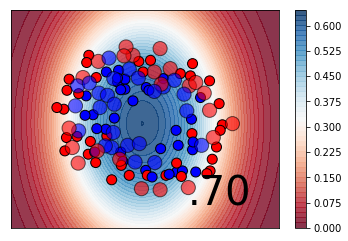

In [27]:
X = []
y = []
with open("./datasets/chip_tests.txt") as m:
    for i,line in enumerate(m):
        data = np.genfromtxt(StringIO(line), delimiter=",")
        subX = data[0], data[1]
        X.append(subX)
        y.append(data[2])
train_and_plot(np.array(X), y)